In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
df_train = pd.DataFrame(pd.read_csv("./PR_HW2_blob_train.csv"))
df_test  = pd.DataFrame(pd.read_csv("./PR_HW2_blob_test.csv"))

X_train = df_train[['Feature1', 'Feature2']].to_numpy()
y_train = df_train[['Target']].to_numpy().ravel()

X_test = df_test[['Feature1', 'Feature2']].to_numpy()
y_test = df_test[['Target']].to_numpy().ravel()

In [28]:
lda = LinearDiscriminantAnalysis(n_components = 1)
X_lda = lda.fit_transform(X_train, y_train)

In [29]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

# 預測測試集
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.878


In [35]:
for i, mean in enumerate(class_means):
    print(mean - lda.means_)

[[ 0.          0.        ]
 [ 5.25879412 11.23357545]
 [-1.63051756 -1.17617375]]
[[ -5.25879412 -11.23357545]
 [  0.           0.        ]
 [ -6.88931168 -12.4097492 ]]
[[ 1.63051756  1.17617375]
 [ 6.88931168 12.4097492 ]
 [ 0.          0.        ]]


In [38]:
print(lda.priors_)
print(X_train[y_train == 0].shape[0])
print(X_train[y_train == 1].shape[0])
print(X_train[y_train == 2].shape[0])

[0.327 0.334 0.339]
327
334
339


In [32]:
class_means = lda.means_

# 計算 Sb 和 Sw
Sb = 0
Sw = 0

for i, mean in enumerate(class_means):
    # 計算類別之間的散布矩陣 Sb
    diff = mean - lda.means_
    Sb += lda.priors_[i] * diff.T.dot(diff)

    # 計算類別內的散布矩陣 Sw
    X_class = X_lda[y_train == i]
    diff = X_class - mean
    Sw += diff.T.dot(diff)

w = np.linalg.inv(Sw).dot(class_means[0] - class_means[1])  # 計算權重 w

print('mean:', class_means)
print('Sb:', Sb)
print('Sw:', Sw)
print('w:', w)

mean: [[-4.17505764  6.35526804]
 [-9.43385176 -4.87830741]
 [-2.54454008  7.53144179]]
Sb: [[ 51.99285869  97.86373723]
 [ 97.86373723 187.97831298]]
Sw: [[116703.51217845  96315.63573983]
 [ 96315.63573983 153536.66746144]]
w: [-3.17710026e-05  9.30958057e-05]


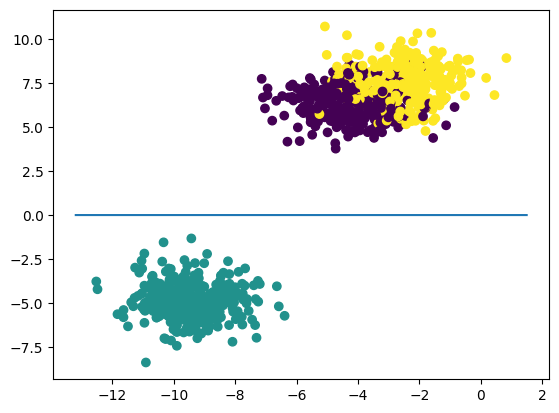

In [33]:
plt.scatter(X_train[:,0], X_train[:, 1], c = y_train)
xmin, xmax = plt.xlim()
x = np.arange(xmin, xmax, 0.01)
y = w[0] * x + w[1]
plt.plot(x, y)